<a href="https://colab.research.google.com/github/Noa810/gal/blob/main/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Wine Quality</h1>
<img src="https://storage.googleapis.com/kaggle-datasets-images/1866301/3047725/a8442c4170479f83d6dcab16b655bf87/dataset-cover.jpg?t=2022-01-15-19-25-24">

<div dir="rtl">
מגישה: נעה בן דוד<br>
בית ספר:מדעים<br>
תעודת זהות: 0218512291
<br>
מורה: מיכל מנדל
<br>
תאריך הגשה: יוני 2025

<div dir="rtl">
קישור לdataset מקאגל-
<br>



https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

<h1> מידע על מאגר הנתונים(מקאגל)- </h1>
<br>

מערך הנתונים הזה קשור לגרסאות אדומות של היין הפורטוגזי "Vinho Verde". מערך הנתונים מתאר את כמות הכימיקלים השונים הקיימים ביין ואת השפעתם על איכותו. ניתן לראות את מערכי הנתונים כמשימות סיווג או רגרסיה. השיעורים מסודרים ולא מאוזנים (למשל, יש הרבה יותר יינות רגילים מאשר מעולים או גרועים). המשימה שלך היא לחזות את איכות היין באמצעות הנתונים הנתונים.

פרויקט פשוט אך מאתגר, לצפות את איכות היין.
המורכבות נובעת מהעובדה שלמערך הנתונים יש פחות דוגמאות, והוא מאוד לא מאוזן.
האם אתה יכול להתגבר על המכשולים האלה ולבנות מודל חיזוי טוב כדי לסווג אותם?




<div dir="rtl">

# **-המחקר שלי**

מטרת המחקר שלי היא לגלות מה הופך יין ליין איכותי ומה המאפיינים המרכזים של יין שכזה

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install scikit-learn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix , classification_report ,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<div dir="rtl">

**העמודות:**

משתני קלט (מבוסס על מבחנים פיזיקוכימיים):\
1 - חומציות קבועה , משתנה ממשי ורציף\
2 - חומציות נדיפה,משתנה ממשי ורציף\
3 - חומצת לימון,משתנה ממשי ורציף\
4 - שאריות סוכר,משתנה ממשי ורציף\
5 - כלורידיםתמשתנה ממשי ורציף\
6 - דו תחמוצת גופרית חופשית,משתנה ממשי ורציף\
7 - סך דו תחמוצת הגופרית,משתנה ממשי ורציף\
8 - צפיפות,משתנה ממשי ורציף\
9 - pH,משתנה ממשי ורציף\
10 - סולפטים,משתנה ממשי ורציף\
11 - אלכוהול,משתנה שלם ורציף\
משתנה פלט (מבוסס על נתונים תחושתיים):\
12 - איכות (ציון בין 0 ל-10),משתנה שלם ורציף

In [5]:
# בדיקה האם יש ערכים חסרים בעזרת הפעולה dropna
# ניתן להבין שאין משתנים חסרים מכיוון שיש אותו מספר שורות גם לפני ביצוע הפעולה
df.dropna(axis=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [6]:
#בדיקת שמות העמודות
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [7]:
df.nunique()

,0
fixed acidity,91
volatile acidity,135
citric acid,77
residual sugar,80
chlorides,131
free sulfur dioxide,53
total sulfur dioxide,138
density,388
pH,87
sulphates,89


פעולה המחזירה את כמות המשתנים שמופיעים לפחות פעם אחת בכל עמודה

In [8]:
df.select_dtypes(include="object").nunique()

,0


<div dir="rtl">
פעולה המחזירה את כל המשתנים המופיעים לפחות פעם אחת בכל עמודה מסוג object,
מכיוון שאין במאגר נתונים עמודה מסוג object בטבלא אין ערכים

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
#df['ripeness'] = df['ripeness'].str.replace

# **ויזואליזציה**

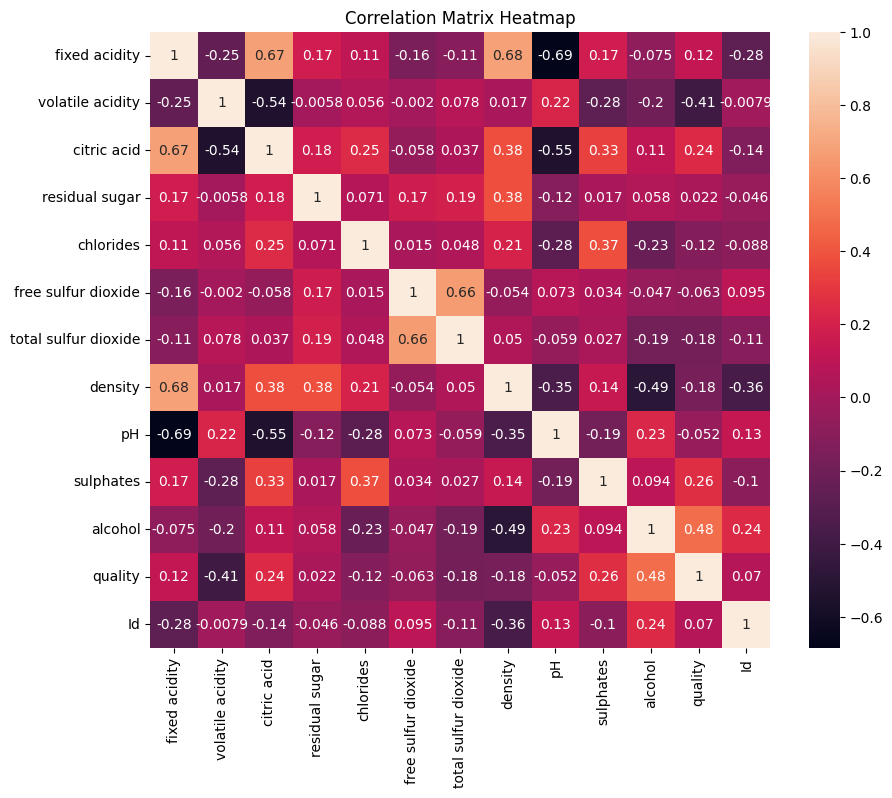

In [11]:

# אני שומרת את הפקודה corr בתור משתנה בשביל ליצור heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.title('Correlation Matrix Heatmap')

ax = sns.heatmap(corr_matrix, annot=True)

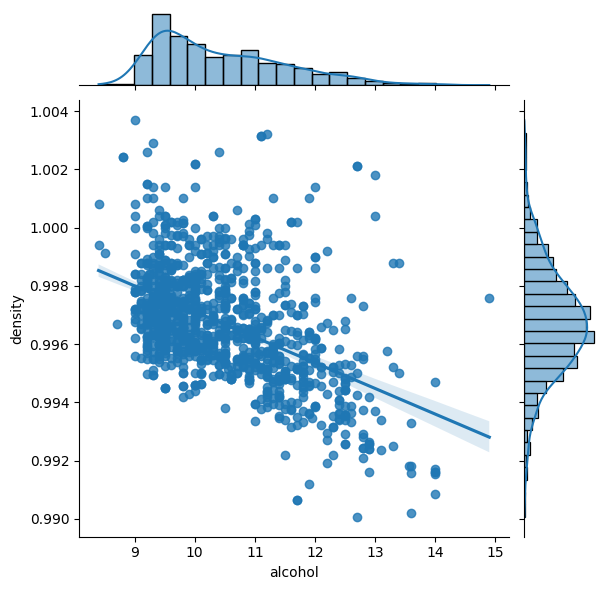

In [132]:
sns.jointplot(x='alcohol', y='density', data=df, kind='reg')  # 'reg' adds a regression line
plt.show()

<div dir="rtl">



<h1> מסקנות: </h1>




**סיכום:**

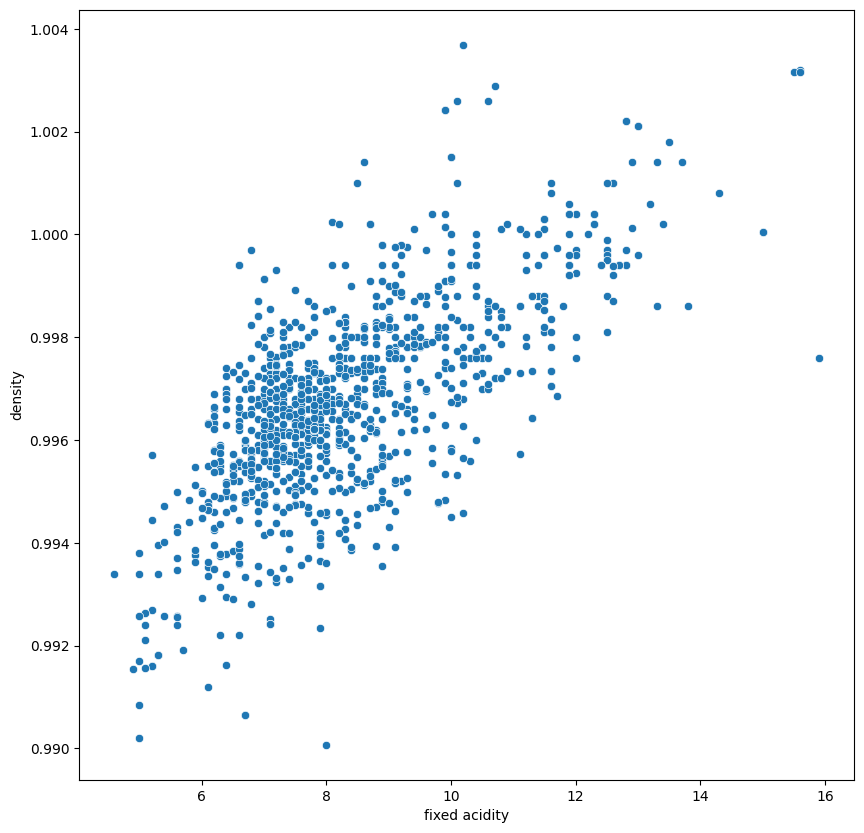

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['fixed acidity'] , y = df['density'])
plt.show()

<div dir="rtl">



<h1> מסקנות: </h1>




**סיכום:**

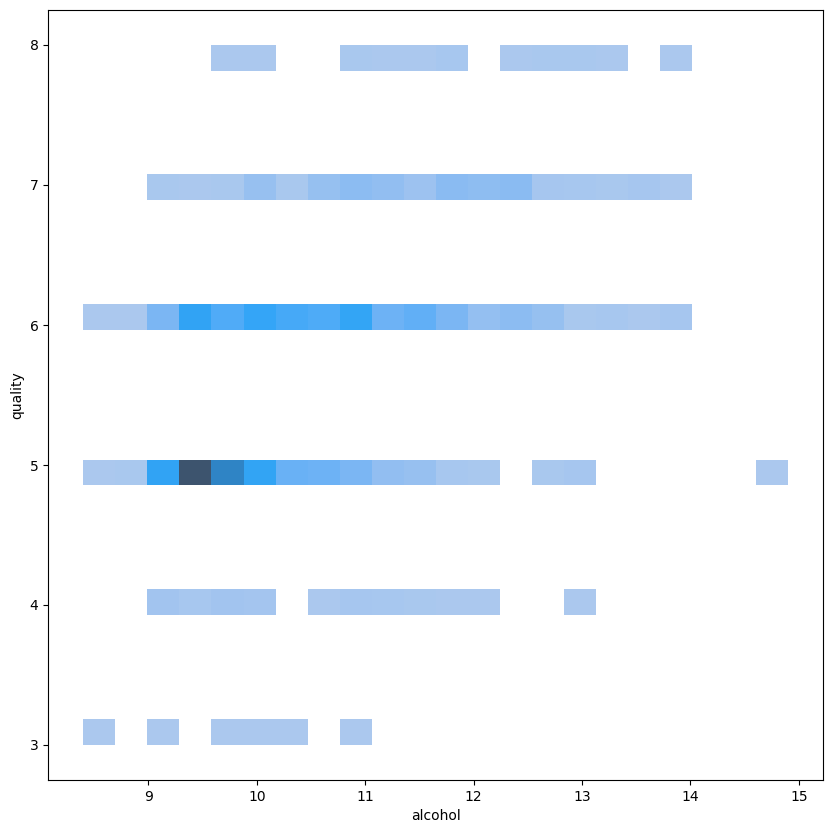

In [14]:
plt.figure(figsize=(10,10))
sns.histplot(x = df['alcohol'] , y = df['quality'])
plt.show()

<div dir="rtl">



<h1> מסקנות: </h1>




**סיכום:**

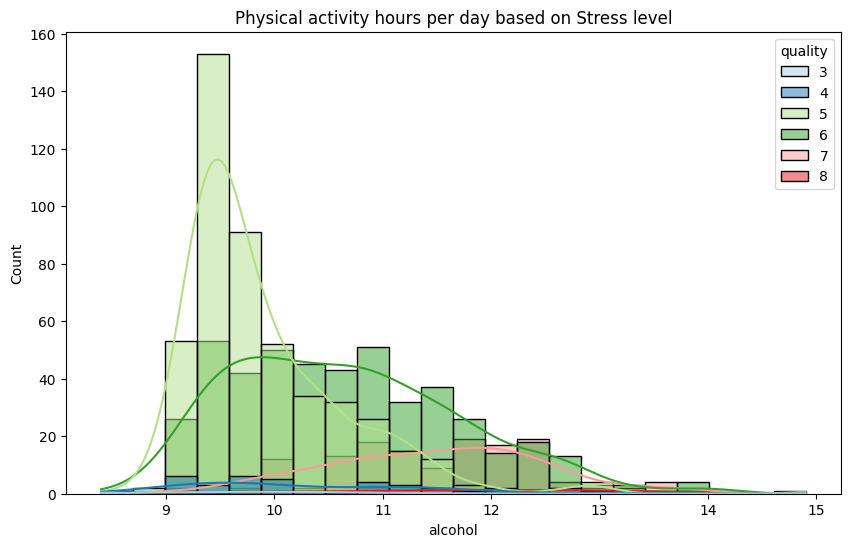

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='alcohol',hue='quality',palette='Paired',kde=True)
plt.title('Physical activity hours per day based on Stress level')
plt.show()

<div dir="rtl">



<h1> מסקנות: </h1>




**סיכום:**

# **KNN**

In [69]:
x = df.drop(['residual sugar'],axis=1).to_numpy()
x.shape

(1143, 12)

In [70]:
y = df['quality'].to_numpy()
y.shape

(1143,)

In [71]:
#שליחת הנתונים לאימון ובדיקה
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,\
                                               shuffle=True,random_state=100)

print("train: ",X_train.shape,y_train.shape)

print("test: ",X_test.shape,y_test.shape)

train:  (914, 12) (914,)
test:  (229, 12) (229,)


In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("min: {} max: {}".format(X_train.min(),X_train.max()))
print("min: {} max: {}".format(X_test.min(),X_test.max()))

#נרמול נתונים בשיטת minmax

min: 0.0 max: 1.0
min: 0.0 max: 1.160714285714286


In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
#11
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('knn', KNeighborsRegressor())
        ])

#12
param_grid = {
    'knn__n_neighbors' :[k for k in range(1,700,20)]
}

In [84]:
#13
knn_clf = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=1)
knn_clf.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 21, 41, 61, 81, 101, 121, 141,
                                              161, 181, 201, 221, 241, 261, 281,
                                              301, 321, 341, 361, 381, 401, 421,
                                              441, 461, 481, 501, 521, 541, 561,
                                              581, ...]},
             verbose=1)

In [76]:
#14
cv_results = pd.DataFrame(knn_clf.cv_results_)
print(cv_results[['param_knn__n_neighbors','mean_test_score','rank_test_score']].sort_values('rank_test_score'))


    param_knn__n_neighbors  mean_test_score  rank_test_score
0                        1         0.813335                1
1                       21         0.772477                2
2                       41         0.729440                3
3                       61         0.699026                4
4                       81         0.670561                5
5                      101         0.641197                6
6                      121         0.615083                7
7                      141         0.589543                8
8                      161         0.567511                9
9                      181         0.547265               10
10                     201         0.527913               11
11                     221         0.511607               12
12                     241         0.493302               13
13                     261         0.476916               14
14                     281         0.458353               15
15                     3

In [77]:
best_k = knn_clf.best_params_['knn__n_neighbors']
print("The best k is: ",best_k)

Knn1 = KNeighborsRegressor(n_neighbors=best_k)
Knn1.fit(X_train,y_train)

The best k is:  1


KNeighborsRegressor(n_neighbors=1)

In [78]:
y_pred = Knn1.predict(X_test)
y_pred.shape

(229,)

<div dir="rtl">



<h1> Confusion matrix & Classification report </h1>




              precision    recall  f1-score   support

           4       0.50      0.25      0.33         8
           5       0.85      0.96      0.90       102
           6       0.94      0.88      0.91        97
           7       0.95      0.86      0.90        22

    accuracy                           0.89       229
   macro avg       0.81      0.74      0.76       229
weighted avg       0.89      0.89      0.89       229



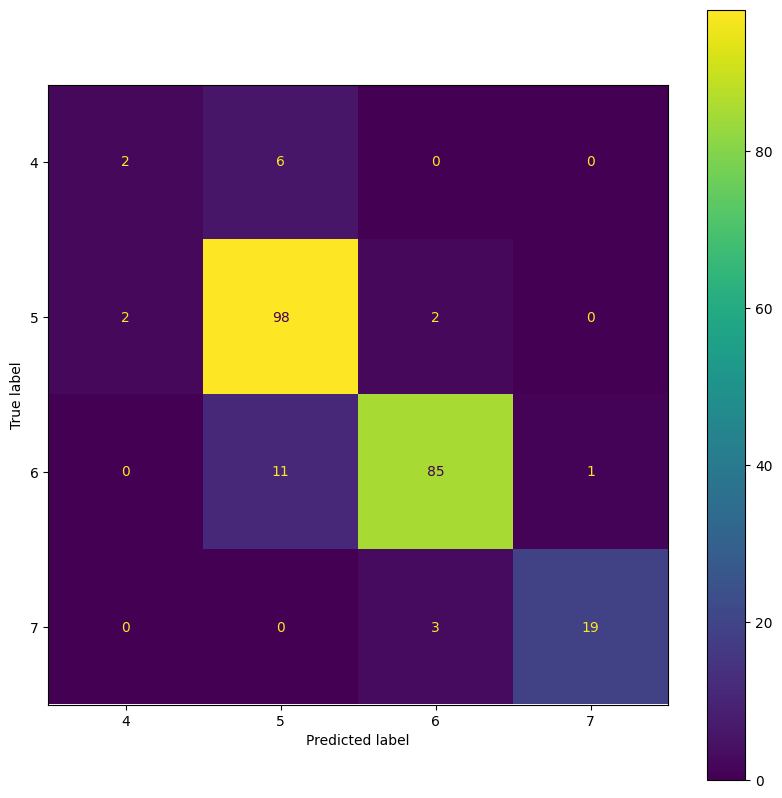

In [79]:
fig,ax = plt.subplots(figsize=(10,10))
confusion_matrix= ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax)
print(classification_report(y_true=y_test, y_pred=y_pred))

In [80]:
accuracy_score(y_true=y_test, y_pred = y_pred)

0.8908296943231441

# **SVM**

In [121]:
x = df.drop(['total sulfur dioxide','density','fixed acidity'],axis=1).to_numpy()
y = df['quality']

In [110]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,\
                                      shuffle=True,random_state=41)
print("train: ", X_train.shape, y_train.shape)
print("test:  " , X_test.shape, y_test.shape)


train:  (914, 12) (914,)
test:   (229, 12) (229,)


In [123]:
from sklearn.svm import SVC

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('svc', SVC())
        ])

In [124]:
param_grid = {
    'svc__kernel': ['linear','rbf','poly'],
    'svc__C' :[0.1,1,10,15]
}
param_grid

{'svc__kernel': ['linear', 'rbf', 'poly'], 'svc__C': [0.1, 1, 10, 15]}

In [125]:
svm_clf_1 = GridSearchCV(pipe, param_grid=param_grid, cv=4, verbose=1)
svm_clf_1.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 15],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [126]:
cv_results = pd.DataFrame(svm_clf_1.cv_results_)
cv_results[['param_svc__C','param_svc__kernel','mean_test_score','rank_test_score']].sort_values('rank_test_score')

,param_svc__C,param_svc__kernel,mean_test_score,rank_test_score
3,1.0,linear,0.996720,1
6,10.0,linear,0.996720,1
9,15.0,linear,0.996720,1
0,0.1,linear,0.994532,4
8,10.0,poly,0.981408,5
11,15.0,poly,0.981408,5
10,15.0,rbf,0.970457,7
7,10.0,rbf,0.970457,7
4,1.0,rbf,0.957323,9
5,1.0,poly,0.946372,10


In [127]:
svm_clf_1.best_params_

{'svc__C': 1, 'svc__kernel': 'linear'}

In [128]:
y_pred = svm_clf_1.predict(X_test)
y_pred.shape

(229,)

In [129]:
accuracy_score(y_true=y_test, y_pred = y_pred)

0.9956331877729258

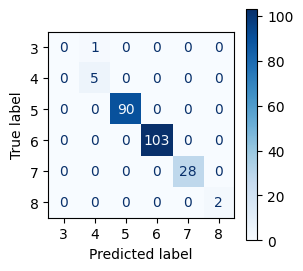

In [130]:
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred = y_pred,\
                                values_format="d",cmap="Blues",ax=ax);

In [131]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00        90
           6       1.00      1.00      1.00       103
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00         2

    accuracy                           1.00       229
   macro avg       0.81      0.83      0.82       229
weighted avg       0.99      1.00      0.99       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
